In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import*
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


In [36]:
df = pd.read_csv("C:/Users/DIPANSHI/Desktop/Datasets/fashion-mnist_test.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
x=df.drop(["label"],axis=1)
y=df["label"]

In [38]:
x.shape,y.shape
x.describe

<bound method DataFrame.describe of       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0          0       0       0       0       0       0       0       9       8   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0      14      53      99   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0      44     105      44      10   
6          0       0       0       0       0       0       0       0       0   
7          0       0       0       0       0       0       0       1       0   
8          0       0       0       0       0       0       0       0       0   
9          0       0       0       0       0       0       0       0       0   
10         0       0       0       0       0       0       0       1       0   
11  

## Normalisation

In [39]:
z = preprocessing.normalize(x)
z
z1 = preprocessing.scale(z)
z1
z1.shape

(10000L, 784L)

# Viewing the image of the items using matplotlib

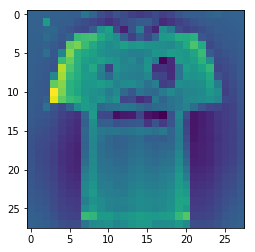

In [40]:
plt.imshow(z1[0].reshape(28,28))

# Implementing a classifier model

##### Spliting the data

In [41]:
z1_train,z1_test,y_train,y_test=train_test_split(z1,y,test_size=0.3)

### Bagging Classifier

In [42]:
model = DecisionTreeClassifier()
num_trees = 100
model1 = BaggingClassifier(base_estimator=model)

In [43]:
model1.fit(z1_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [44]:
pred = model1.predict(z1_test)

In [45]:
metrics.accuracy_score(y_test,pred)

0.8116666666666666

In [46]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.71      0.78      0.74       307
          1       0.95      0.93      0.94       312
          2       0.69      0.75      0.72       304
          3       0.84      0.82      0.83       306
          4       0.71      0.77      0.74       291
          5       0.88      0.88      0.88       293
          6       0.62      0.46      0.53       284
          7       0.87      0.86      0.87       304
          8       0.92      0.97      0.94       301
          9       0.88      0.88      0.88       298

avg / total       0.81      0.81      0.81      3000



In [47]:
confusion_matrix(y_test,pred)

array([[239,   4,  13,  12,   3,   0,  31,   0,   5,   0],
       [  3, 290,   1,  13,   2,   0,   3,   0,   0,   0],
       [  8,   1, 228,   0,  44,   0,  18,   0,   5,   0],
       [ 18,   8,   9, 250,  14,   0,   6,   0,   1,   0],
       [  1,   0,  39,   8, 225,   0,  18,   0,   0,   0],
       [  0,   0,   1,   2,   0, 257,   0,  21,   5,   7],
       [ 68,   1,  37,  11,  28,   2, 132,   0,   5,   0],
       [  0,   0,   0,   0,   0,  14,   0, 262,   1,  27],
       [  1,   1,   1,   0,   0,   2,   5,   0, 291,   0],
       [  0,   0,   0,   0,   0,  17,   0,  18,   2, 261]], dtype=int64)

### Random Forest Classifier

In [48]:
rf=RandomForestClassifier()
rf.fit(z1_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
pred1 = rf.predict(z1_test)

In [50]:
metrics.accuracy_score(y_test,pred1)

0.8103333333333333

In [51]:
print(classification_report(y_test,pred1))

             precision    recall  f1-score   support

          0       0.73      0.75      0.74       307
          1       0.95      0.91      0.93       312
          2       0.68      0.74      0.71       304
          3       0.83      0.86      0.84       306
          4       0.71      0.75      0.73       291
          5       0.90      0.89      0.90       293
          6       0.55      0.44      0.49       284
          7       0.88      0.85      0.86       304
          8       0.94      0.96      0.95       301
          9       0.89      0.92      0.91       298

avg / total       0.81      0.81      0.81      3000



In [52]:
confusion_matrix(y_test,pred1)

array([[229,   3,  10,  18,   0,   0,  42,   0,   5,   0],
       [  3, 285,   5,  10,   2,   0,   7,   0,   0,   0],
       [  7,   1, 225,   2,  43,   0,  23,   0,   3,   0],
       [ 10,  10,   7, 263,   8,   0,   8,   0,   0,   0],
       [  0,   1,  38,  10, 219,   0,  23,   0,   0,   0],
       [  2,   0,   0,   1,   0, 262,   0,  16,   4,   8],
       [ 62,   1,  43,  14,  32,   0, 126,   0,   6,   0],
       [  0,   0,   0,   0,   0,  22,   0, 257,   0,  25],
       [  1,   0,   2,   0,   3,   2,   2,   1, 290,   0],
       [  0,   0,   0,   0,   0,   5,   0,  17,   1, 275]], dtype=int64)

### Gradient Boosting Classifier

In [53]:
gbc = GradientBoostingClassifier(n_estimators=30)#,verbose=1)

In [54]:
gbc.fit(z1_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [55]:
pred2 = gbc.predict(z1_test)

In [56]:
metrics.accuracy_score(y_test,pred2)

0.819

In [57]:
print(classification_report(y_test,pred2))

             precision    recall  f1-score   support

          0       0.78      0.77      0.77       307
          1       0.97      0.91      0.94       312
          2       0.75      0.69      0.72       304
          3       0.82      0.84      0.83       306
          4       0.72      0.78      0.75       291
          5       0.93      0.87      0.90       293
          6       0.57      0.58      0.57       284
          7       0.88      0.84      0.86       304
          8       0.93      0.97      0.95       301
          9       0.84      0.93      0.88       298

avg / total       0.82      0.82      0.82      3000



In [58]:
confusion_matrix(y_test,pred2)

array([[235,   1,   5,  22,   4,   0,  34,   0,   5,   1],
       [  3, 285,   7,  14,   1,   0,   2,   0,   0,   0],
       [  2,   1, 209,   1,  45,   0,  41,   0,   5,   0],
       [ 11,   6,   2, 256,  15,   0,  16,   0,   0,   0],
       [  0,   2,  25,   6, 228,   0,  29,   0,   1,   0],
       [  1,   0,   0,   0,   0, 255,   0,  21,   2,  14],
       [ 51,   0,  28,  12,  22,   0, 164,   0,   7,   0],
       [  0,   0,   0,   0,   0,  11,   0, 256,   1,  36],
       [  0,   0,   1,   1,   0,   3,   4,   0, 292,   0],
       [  0,   0,   0,   0,   2,   4,   0,  15,   0, 277]], dtype=int64)

# Comparing different Classifiers

In [59]:
list = []
h1 = LogisticRegression()
h2 = DecisionTreeClassifier()
h3 = svm.SVC()
list = VotingClassifier([('LogisticRegression', h1), ('DecisionTreeClassifier', h2), ('SVM', h3)])

In [60]:
list.fit(z1_train,y_train)

VotingClassifier(estimators=[('LogisticRegression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [61]:
pred3 = list.predict(z1_test) 

C:\Users\DIPANSHI\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [62]:
metrics.accuracy_score(y_test,pred3)

0.8406666666666667

In [63]:
print(classification_report(y_test,pred3))

             precision    recall  f1-score   support

          0       0.74      0.83      0.78       307
          1       0.95      0.95      0.95       312
          2       0.73      0.75      0.74       304
          3       0.88      0.84      0.86       306
          4       0.77      0.79      0.78       291
          5       0.92      0.90      0.91       293
          6       0.65      0.53      0.58       284
          7       0.89      0.89      0.89       304
          8       0.93      0.98      0.95       301
          9       0.92      0.94      0.93       298

avg / total       0.84      0.84      0.84      3000



In [64]:
confusion_matrix(y_test,pred3)

array([[254,   1,  10,  13,   0,   1,  24,   0,   4,   0],
       [  1, 295,   2,   9,   0,   0,   4,   0,   1,   0],
       [ 11,   1, 228,   0,  37,   0,  23,   0,   4,   0],
       [ 18,   8,   7, 257,   9,   0,   6,   0,   1,   0],
       [  1,   1,  30,   6, 231,   0,  22,   0,   0,   0],
       [  1,   0,   0,   0,   0, 264,   0,  18,   5,   5],
       [ 58,   3,  36,   6,  23,   2, 150,   0,   6,   0],
       [  0,   0,   0,   0,   0,  14,   0, 270,   0,  20],
       [  1,   1,   1,   1,   1,   0,   1,   1, 294,   0],
       [  0,   0,   0,   0,   0,   5,   0,  14,   0, 279]], dtype=int64)